# Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from tensorflow.keras.layers import LeakyReLU


# Importing the data set and performing data augmentation

In [5]:
train_path = r'C:\Users\Shivam Sharma\Documents\minor_project\train'
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 4,
                                   width_shift_range=0.15,
                                   height_shift_range = 0.2,
                                   shear_range=0.3,
                                   fill_mode='nearest',
                                   validation_split=0.25)
train_set = train_datagen.flow_from_directory(directory=train_path, class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(64,64), batch_size=128, shuffle=True,
                                                    subset ="training")
validation_set = train_datagen.flow_from_directory(directory=train_path,
                                                 target_size = (64,64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',subset="validation",shuffle=True)

Found 12525 images belonging to 19 classes.
Found 4175 images belonging to 19 classes.


# Defing the model 

In [12]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32,input_shape=(64,64,1),kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.15))
    

    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))
    padding="same"
    model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(19,activation='softmax'))
 
    
    model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['accuracy']
                )
    return model 

In [13]:
model = make_model()
model.summary()

c:\Users\Shivam Sharma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 19)             │           627 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,139 (645.07 KB)

 Trainable params: 165,139 (645.07 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [14]:
h = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=20,
    steps_per_epoch=64,
    validation_steps=48,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='auto'),
        keras.callbacks.ModelCheckpoint(
            'explo/model_{val_loss:.3f}.keras',
            save_best_only=True,
            save_weights_only=False,
            monitor='val_loss'
        )
    ]
)

# Save the final model
model.save('explo_model.h5')


Epoch 1/20


c:\Users\Shivam Sharma\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.1241 - loss: 2.7757 - val_accuracy: 0.5697 - val_loss: 1.3013
Epoch 2/20
34/64 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.6108 - loss: 1.1835

c:\Users\Shivam Sharma\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.6422 - loss: 1.0796 - val_accuracy: 0.8132 - val_loss: 0.5134
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 480ms/step - accuracy: 0.8152 - loss: 0.5127 - val_accuracy: 0.9352 - val_loss: 0.2188
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9282 - loss: 0.2161 - val_accuracy: 0.9519 - val_loss: 0.1475
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.9536 - loss: 0.1375 - val_accuracy: 0.9648 - val_loss: 0.1166
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9558 - loss: 0.1112 - val_accuracy: 0.9601 - val_loss: 0.1187
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.9682 - loss: 0.0884 - val_accuracy: 0.9710 - val_loss: 0.1055
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9770 - loss: 0.0767 - val_accuracy: 0.9755 - val_loss: 0.0706
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9779 - loss: 0.0657 - val_accuracy: 0.9766 - v

In [15]:
## Loading the saved model
from keras.models import load_model
model = load_model('explo_model.h5')

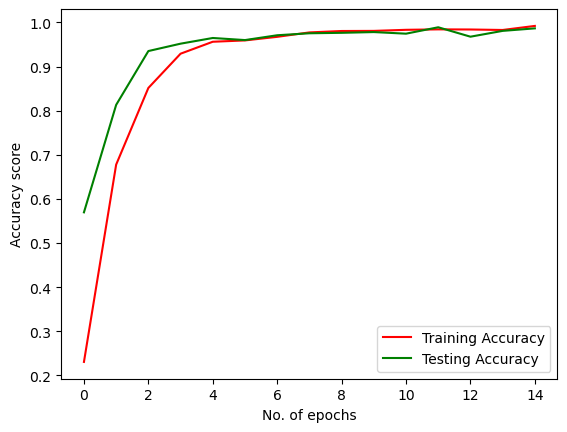

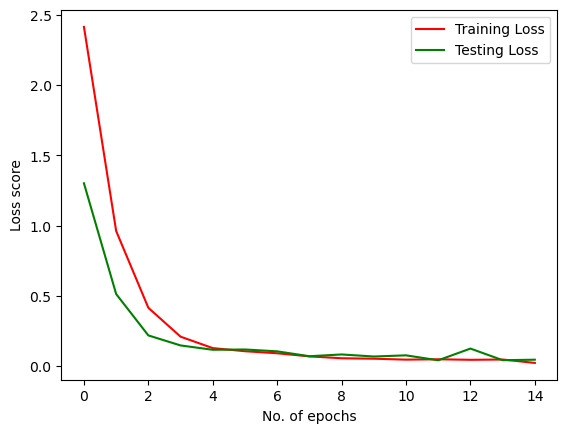

In [16]:
%matplotlib inline
accu= h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy score')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss score')
plt.legend()
plt.show()
		
